In [1]:
import sklearn 
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import re
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

from sklearn import svm
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import cross_val_score

from sklearn.model_selection import RepeatedStratifiedKFold, cross_val_predict
from sklearn.metrics import r2_score 


from sklearn.neural_network import MLPClassifier
from collections import Counter
from sklearn.ensemble import AdaBoostClassifier
from sklearn.preprocessing import OrdinalEncoder
from imblearn.over_sampling import SMOTE
# tuning parameters for decision tree
from sklearn.metrics import roc_curve, auc
from imblearn.under_sampling import TomekLinks 
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from imblearn.over_sampling import SVMSMOTE
import random
from sklearn.preprocessing import MinMaxScaler

<AxesSubplot:>

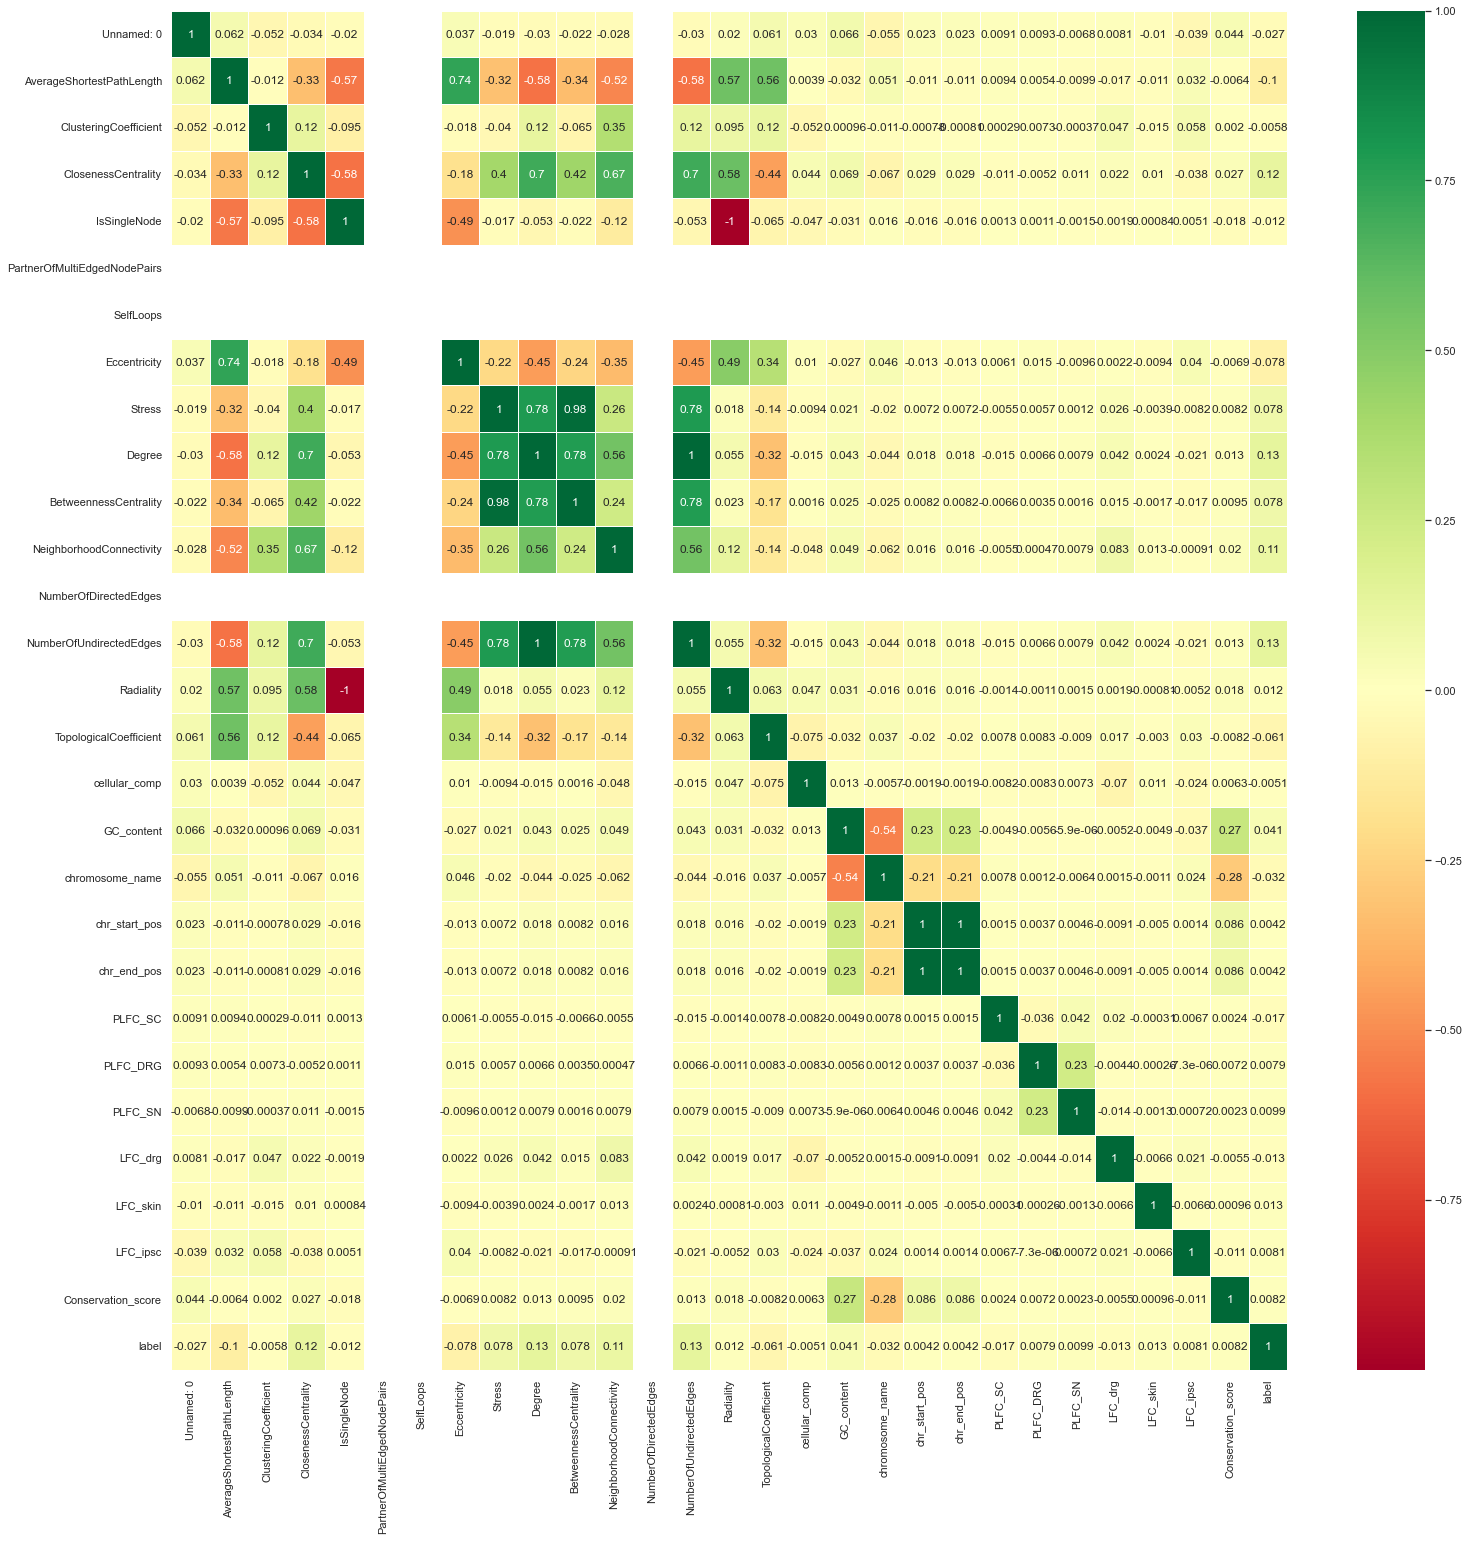

In [22]:
plt.figure(figsize=(25, 25))
color = 'RdYlGn'
sns.heatmap(data.corr(),annot=True, linewidth=.5, cmap=color)

### Highly correlated features 

* Eccentricity, AverageShortestPathLength <br>
* TopologicalCoefficient and AverageShortestPathLength <br>
* Radiality and ClosenessCentrality <br>
* NumberOfUndirectedEdges and ClosenessCentrality <br>
* ClosenessCentrality and degree <br>
* NeighborhoodConnectivity and ClosenessCentrality <br>
* Chromosome end point and start point <br>

## Models to be used 

* The Random Forest
* Adaptive Regression Splines 
* Naive Bayes 
* Neural Network 
* Logistic Regression

In [2]:
# Read in /data 
data = pd.read_csv("~/Desktop/top_data.csv")

## Exploratory Data Analysis 

In [3]:
data.describe()

,Unnamed: 0,AverageShortestPathLength,ClusteringCoefficient,ClosenessCentrality,IsSingleNode,PartnerOfMultiEdgedNodePairs,SelfLoops,Eccentricity,Stress,Degree,...,chr_start_pos,chr_end_pos,PLFC_SC,PLFC_DRG,PLFC_SN,LFC_drg,LFC_skin,LFC_ipsc,Conservation_score,label
count,18184.000000,18184.000000,18184.000000,18184.000000,18184.000000,18184.0,18184.0,18184.000000,1.818400e+04,18184.000000,...,1.818400e+04,1.818400e+04,18184.000000,18184.000000,18184.000000,18184.000000,18184.000000,18184.000000,18184.000000,18184.000000
mean,9092.500000,2.810491,0.201610,0.355820,1.003575,0.0,0.0,4.617686,2.080149e+06,92.369886,...,7.038273e+07,7.045048e+07,-0.000319,-0.001145,0.002709,0.003099,-0.000750,-0.083969,0.094080,0.038165
std,5249.412983,0.295203,0.127419,0.036783,0.059682,0.0,0.0,0.562937,7.295070e+06,103.688205,...,5.676698e+07,5.677785e+07,0.014435,0.062076,0.108164,0.586089,0.053694,0.432762,0.064959,0.191601
min,1.000000,0.000000,0.000000,0.000000,1.000000,0.0,0.0,0.000000,0.000000e+00,0.000000,...,0.000000e+00,0.000000e+00,-0.739000,-1.661000,-1.640000,-4.811047,-2.484435,-5.304283,0.000000,0.000000
25%,4546.750000,2.666795,0.111111,0.338854,1.000000,0.0,0.0,4.000000,2.265990e+05,31.000000,...,2.703032e+07,2.708545e+07,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.057176,0.000000
50%,9092.500000,2.810548,0.176471,0.355558,1.000000,0.0,0.0,5.000000,6.454190e+05,61.000000,...,5.525910e+07,5.531914e+07,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.089524,0.000000
75%,13638.250000,2.948780,0.260418,0.374633,1.000000,0.0,0.0,5.000000,1.744188e+06,115.000000,...,1.077088e+08,1.077768e+08,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.124498,0.000000
max,18184.000000,4.392317,1.000000,0.496669,2.000000,0.0,0.0,6.000000,3.211772e+08,1808.000000,...,2.489062e+08,2.489199e+08,0.360000,0.842000,2.746000,7.748629,2.573436,9.449046,0.881398,1.000000


In [4]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18184 entries, 0 to 18183
Data columns (total 32 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Unnamed: 0                    18184 non-null  int64  
 1   symbol                        18184 non-null  object 
 2   ID                            18184 non-null  object 
 3   AverageShortestPathLength     18184 non-null  float64
 4   ClusteringCoefficient         18184 non-null  float64
 5   ClosenessCentrality           18184 non-null  float64
 6   IsSingleNode                  18184 non-null  int64  
 7   PartnerOfMultiEdgedNodePairs  18184 non-null  int64  
 8   SelfLoops                     18184 non-null  int64  
 9   Eccentricity                  18184 non-null  int64  
 10  Stress                        18184 non-null  int64  
 11  Degree                        18184 non-null  int64  
 12  BetweennessCentrality         18184 non-null  float64
 13  N

In [3]:
# convert cellular component to ordinal 
encoder = OrdinalEncoder()
X_encoded = encoder.fit_transform(data[['cellular_comp']])
print('Encoded data:\n', np.array(X_encoded))
data['cellular_comp'] = X_encoded

Encoded data:
 [[10.]
 [10.]
 [16.]
 ...
 [ 2.]
 [13.]
 [13.]]


In [4]:
# Replace all missing and invalid values with 0
data.fillna(value=0, inplace=True)
data.replace([np.inf, -np.inf], 0, inplace=True)

In [7]:
data.columns

Index(['Unnamed: 0', 'symbol', 'ID', 'AverageShortestPathLength',
       'ClusteringCoefficient', 'ClosenessCentrality', 'IsSingleNode',
       'PartnerOfMultiEdgedNodePairs', 'SelfLoops', 'Eccentricity', 'Stress',
       'Degree', 'BetweennessCentrality', 'NeighborhoodConnectivity',
       'NumberOfDirectedEdges', 'NumberOfUndirectedEdges', 'Radiality',
       'TopologicalCoefficient', 'cellular_comp', 'GC_content',
       'chromosome_name', 'chr_start_pos', 'chr_end_pos', 'PLFC_SC',
       'PLFC_DRG', 'PLFC_SN', 'GO_vector', 'LFC_drg', 'LFC_skin', 'LFC_ipsc',
       'Conservation_score', 'label'],
      dtype='object')

In [5]:
# drop columns  
df = data.drop(['Unnamed: 0', 'symbol', 'ID', "IsSingleNode",
                'PartnerOfMultiEdgedNodePairs', 
                'SelfLoops', 'NumberOfDirectedEdges', 
               'chr_start_pos', 'chr_end_pos'],axis = 1)

# proportion of chr length & location 

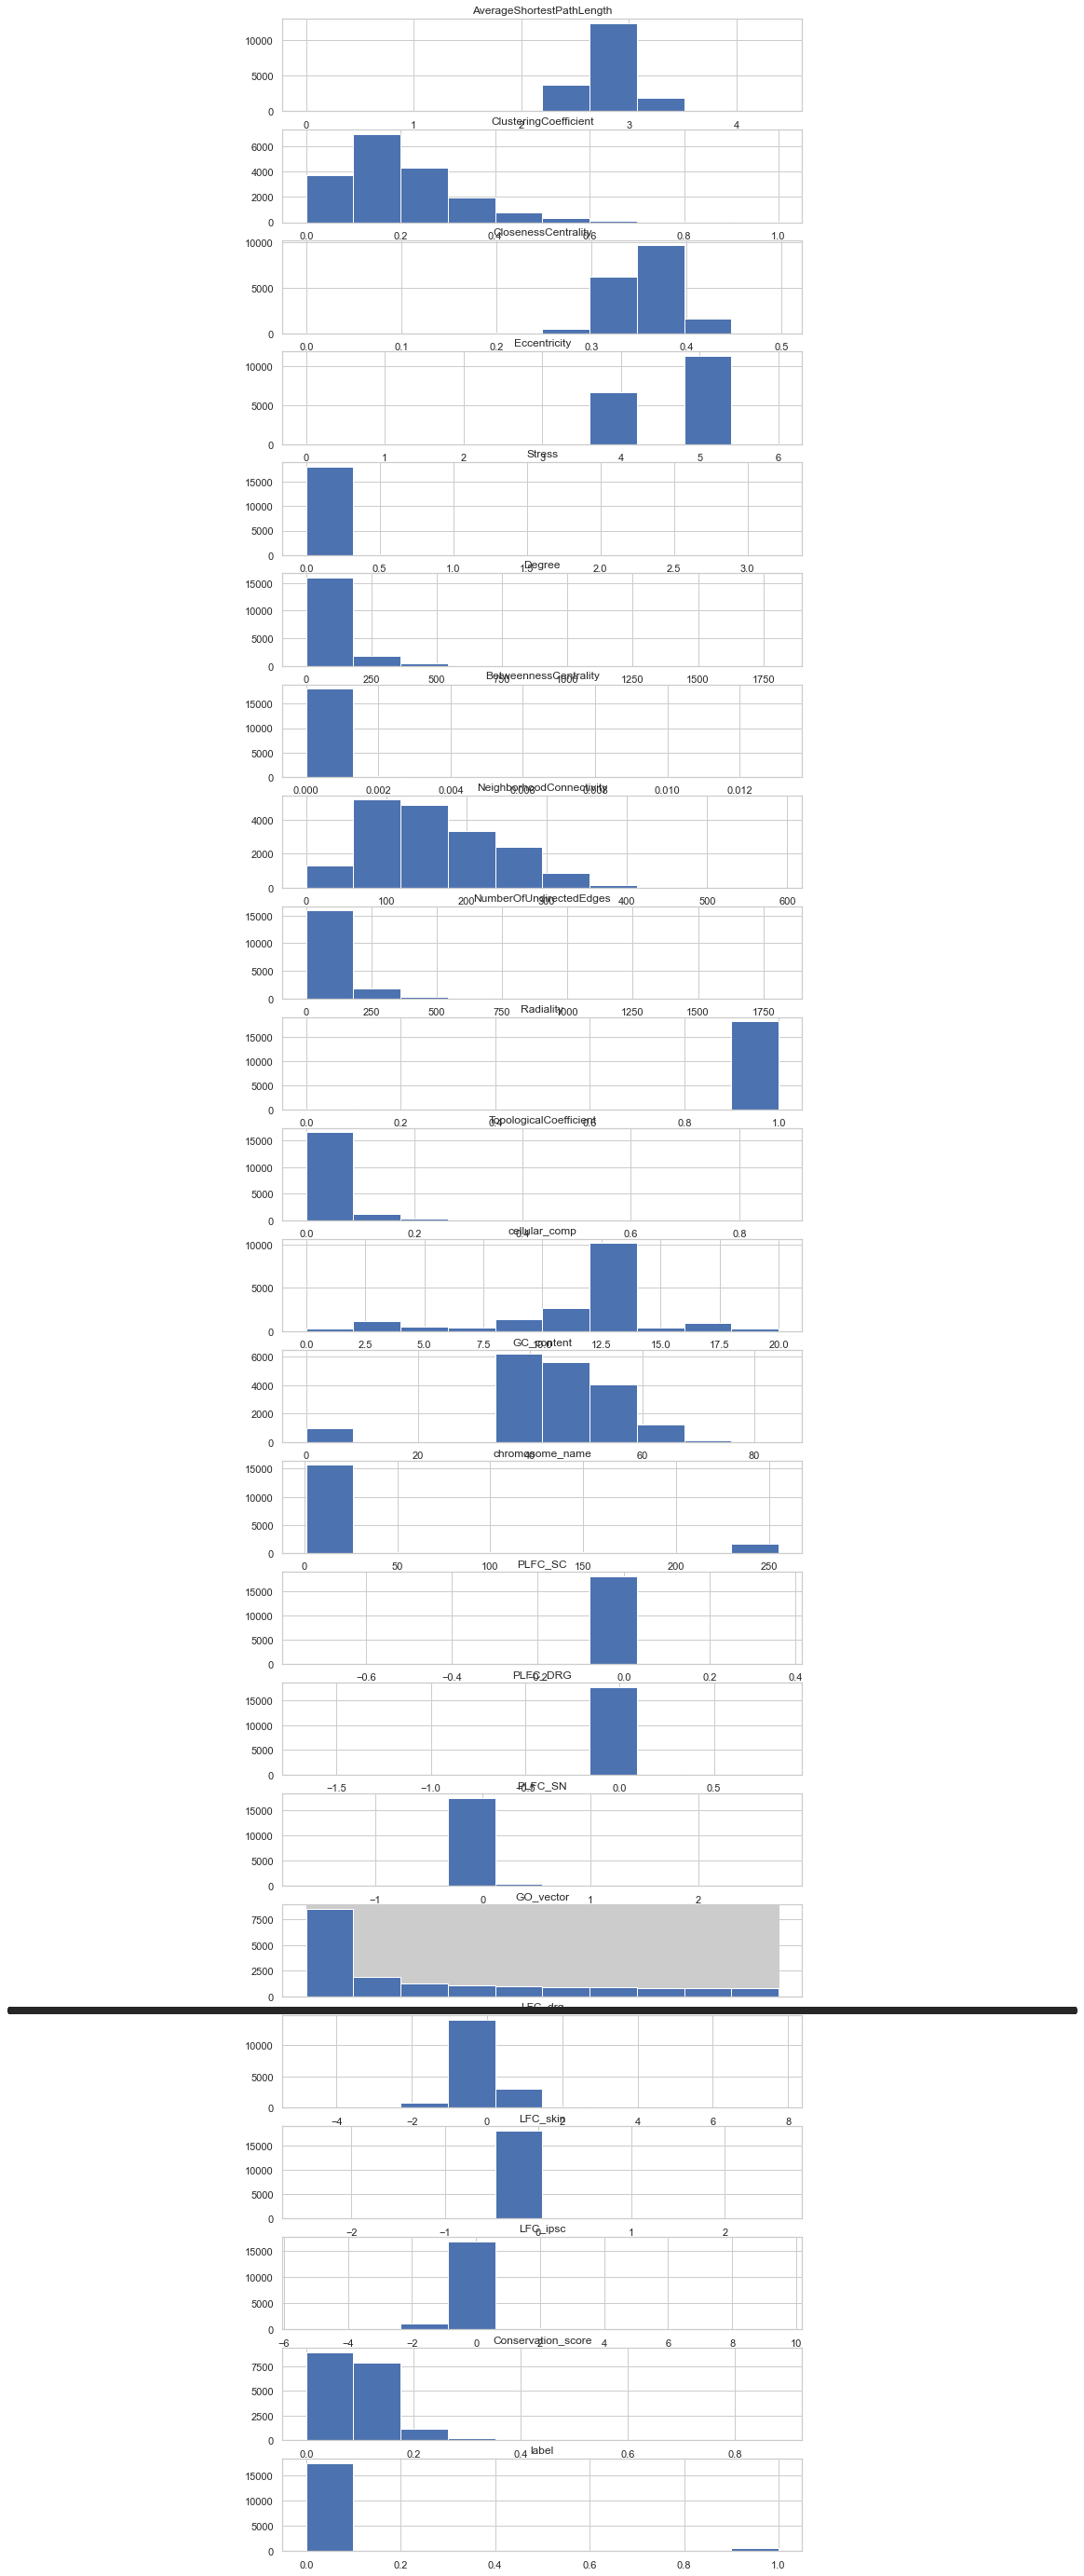

In [213]:
# plot his-plots of feature distribution 
fig, axs = plt.subplots(len(df.columns), 1, figsize=(10,60))
for i, col in enumerate(df.columns):
    axs[i].hist(df[col])
    axs[i].set_title(col)
plt.show()

0    0.961835
1    0.038165
Name: label, dtype: float64


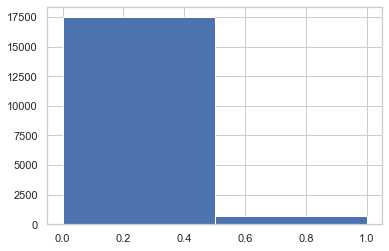

In [228]:
print(df["label"].value_counts(normalize=True))
plt.hist(df['label'], bins=[0,0.5,1])
plt.show()

In [9]:
display(df)

,AverageShortestPathLength,ClusteringCoefficient,ClosenessCentrality,Eccentricity,Stress,Degree,BetweennessCentrality,NeighborhoodConnectivity,NumberOfUndirectedEdges,Radiality,...,chromosome_name,PLFC_SC,PLFC_DRG,PLFC_SN,GO_vector,LFC_drg,LFC_skin,LFC_ipsc,Conservation_score,label
0,2.741141,0.317103,0.364812,4,1201990,71,0.000060,243.915493,71,0.999037,...,16,0.0,0.000,0.0,0000000000000000000000000110000000000000000000...,0.000000,0.0,0.000000,0.106428,0
1,2.582404,0.233373,0.387236,4,3298502,185,0.000136,231.232432,185,0.999125,...,16,0.0,0.000,0.0,0000000000000000000000000000000000000000001000...,0.927060,0.0,0.000000,0.065339,0
2,2.899161,0.153846,0.344927,5,489422,40,0.000038,105.625000,40,0.998950,...,9,0.0,0.000,0.0,0000100110000000000011100000000000000000001101...,0.000000,0.0,0.000000,0.130655,0
3,2.974445,0.156989,0.336197,5,208392,31,0.000021,86.129032,31,0.998908,...,45,0.0,0.000,0.0,0000000000000000000100000000000000000000000000...,-2.126374,0.0,0.000000,0.000000,0
4,2.824539,0.101408,0.354040,4,1113422,71,0.000116,88.492958,71,0.998991,...,1,0.0,0.000,0.0,0000000000000000000001000000000000000000000000...,-1.313771,0.0,0.000000,0.070893,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18179,2.923998,0.339902,0.341998,5,194798,29,0.000016,153.206900,29,0.998936,...,255,0.0,0.000,0.0,0000000000000000000000000000000000000000000000...,0.000000,0.0,0.000000,0.094780,0
18180,2.818137,0.138039,0.354844,5,962138,51,0.000068,140.529400,51,0.998994,...,20,0.0,0.000,0.0,0000000000000000000000000000000000000000000000...,-0.257502,0.0,-0.784598,0.057839,0
18181,2.557236,0.158074,0.391047,4,2468928,131,0.000130,248.877900,131,0.999139,...,1,0.0,-0.503,0.0,0000000000000000000000010000000000000000000000...,0.248134,0.0,0.000000,0.161909,0
18182,2.911911,0.070588,0.343417,5,1332768,35,0.000127,90.857140,35,0.998942,...,15,0.0,0.000,0.0,0000000000000000000000000000000000000000000000...,0.000000,0.0,0.000000,0.092805,0


### Run Statistical Tests to Explore correlations 

In [105]:
from scipy.stats import chi2_contingency, kruskal
# Create separate DataFrames for categorical and numerical variables
categorical_vars = df.select_dtypes(include='object')
numerical_vars = df.select_dtypes(include=['int', 'float'])

# Loop through each categorical variable and perform the chi-square test
for col in categorical_vars:
    contingency_table = pd.crosstab(df[col], df['label'])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    if p < 0.05:  # Check if the p-value is significant
        print(f"{col} is significantly associated with the outcome (p-value = {p:.3f})")

# Loop through each numerical variable and perform the Kruskal-Wallis test
for col in numerical_vars:
    group1 = df[df['label'] == 0][col]
    group2 = df[df['label'] == 1][col]
    stat, p = kruskal(group1, group2)
    if p < 0.05:  # Check if the p-value is significant
        print(f"{col} is significantly associated with the outcome (p-value = {p:.3f})")

GO_vector is significantly associated with the outcome (p-value = 0.000)
Unnamed: 0 is significantly associated with the outcome (p-value = 0.000)
AverageShortestPathLength is significantly associated with the outcome (p-value = 0.000)
ClosenessCentrality is significantly associated with the outcome (p-value = 0.000)
Eccentricity is significantly associated with the outcome (p-value = 0.000)
Stress is significantly associated with the outcome (p-value = 0.000)
Degree is significantly associated with the outcome (p-value = 0.000)
BetweennessCentrality is significantly associated with the outcome (p-value = 0.000)
NeighborhoodConnectivity is significantly associated with the outcome (p-value = 0.000)
NumberOfUndirectedEdges is significantly associated with the outcome (p-value = 0.000)
Radiality is significantly associated with the outcome (p-value = 0.000)
TopologicalCoefficient is significantly associated with the outcome (p-value = 0.000)
GC_content is significantly associated with th

In [185]:
# Replace all missing and invalid values with 0
df.fillna(value=0, inplace=True)
df.replace([np.inf, -np.inf], 0, inplace=True)

## Baseline model using DummyClassifier

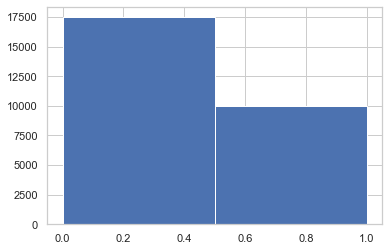

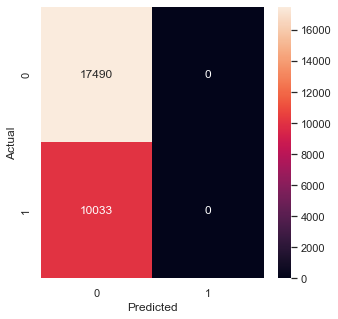

Mean Accuracy: 0.635
Classification report:
              precision    recall  f1-score   support

           0       0.64      1.00      0.78     17490
           1       0.00      0.00      0.00     10033

    accuracy                           0.64     27523
   macro avg       0.32      0.50      0.39     27523
weighted avg       0.40      0.64      0.49     27523



In [20]:
x = df.values[:,:-1]
y = df.values[:,-1]
y = y.astype('int')

# Apply SMOTE oversampling to balance the classes
oversample = SVMSMOTE()
X, y = oversample.fit_resample(x, y)

plt.hist(y, bins=[0,0.5,1])
plt.show()

# Create a Naive Bayes classifier
model = DummyClassifier(strategy='most_frequent')
# Train the classifier on the training data
model.fit(X,y)

y_pred = cross_val_predict(model, X, y, cv=10)
conf_mat = confusion_matrix(y, y_pred)
fig, ax = plt.subplots(figsize=(5,5))
sns.heatmap(conf_mat, annot=True, fmt='d')

plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()
accuracy = accuracy_score(y, y_pred)

report = classification_report(y, y_pred)
print('Mean Accuracy: %.3f' % (accuracy))
print(f"Classification report:\n{report}")

## Naive Bayes

[[0.69369107 0.30630893]
 [0.69369107 0.30630893]
 [0.69368873 0.30631127]
 ...
 [0.69354334 0.30645666]
 [0.05043503 0.94956497]
 [0.69369107 0.30630893]]


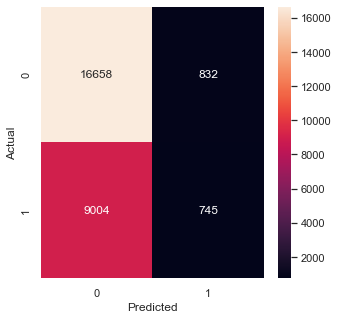

Classification report:
              precision    recall  f1-score   support

           0       0.65      0.95      0.77     17490
           1       0.47      0.08      0.13      9749

    accuracy                           0.64     27239
   macro avg       0.56      0.51      0.45     27239
weighted avg       0.59      0.64      0.54     27239



In [24]:
random.seed(711)
x = df.values[:,:-1]
y = df.values[:,-1]
y = y.astype('int')

# Apply SMOTE oversampling to balance the classes
oversample = SVMSMOTE()
X, y = oversample.fit_resample(x, y)

# Create a Naive Bayes classifier
nb = GaussianNB()
# Train the classifier on the training data
nb.fit(X,y)

# the probabilities 
proba = nb.predict_proba(X)
print(proba)

y_pred = cross_val_predict(nb, X, y, cv=10)
conf_mat = confusion_matrix(y, y_pred)
fig, ax = plt.subplots(figsize=(5,5))
sns.heatmap(conf_mat, annot=True, fmt='d')

plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()
accuracy = accuracy_score(y, y_pred)

report = classification_report(y, y_pred)

print(f"Classification report:\n{report}")

In [25]:
# the probability scores 
proba = nb.predict_proba(x)
probs = pd.DataFrame(proba)
probs['symbol'] = data['symbol']

probs = probs.sort_values(by=1,ascending=False )
display(probs)

probs.to_csv('~/Desktop/my_data.csv', index=False)

,0,1,symbol
7814,0.022033,0.977967,KCNJ5
12764,0.022033,0.977967,RAX2
12390,0.023652,0.976348,PTDSS2
853,0.023654,0.976346,AQR
12963,0.023673,0.976327,RGS1
...,...,...,...
7372,0.693691,0.306309,IKZF4
7374,0.693691,0.306309,IL10
7375,0.693691,0.306309,IL10RA
7376,0.693691,0.306309,IL10RB


## Random Forest 

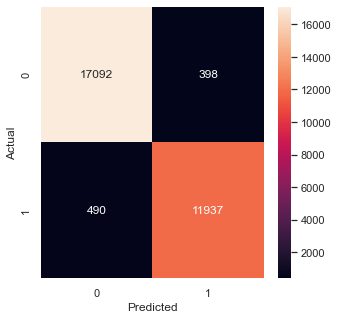

Classification report:
              precision    recall  f1-score   support

           0       0.97      0.98      0.97     17490
           1       0.97      0.96      0.96     12427

    accuracy                           0.97     29917
   macro avg       0.97      0.97      0.97     29917
weighted avg       0.97      0.97      0.97     29917



In [27]:
import random
from sklearn.preprocessing import MinMaxScaler
from imblearn import under_sampling, over_sampling
from imblearn.over_sampling import SVMSMOTE

random.seed(711)
df.fillna(value=0, inplace=True)
df.replace([np.inf, -np.inf], 0, inplace=True)

X = df.values[:,:-1]
y = df.values[:,-1]
y = y.astype('int')

# scale the data - to a range -1, 1 
min_max_scaler = MinMaxScaler(feature_range = (-1,1))
X = min_max_scaler.fit_transform(X)

# Apply SMOTE oversampling to balance the classes
oversample = SVMSMOTE()
X, y = oversample.fit_resample(X, y)

model = RandomForestClassifier(n_estimators=200, random_state=42)

# Train the classifier on the training data
model.fit(X,y)

y_pred = cross_val_predict(model, X, y, cv=10)
conf_mat = confusion_matrix(y, y_pred)
fig, ax = plt.subplots(figsize=(5,5))
sns.heatmap(conf_mat, annot=True, fmt='d')

plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()
accuracy = accuracy_score(y, y_pred)

report = classification_report(y, y_pred)

print(f"Classification report:\n{report}")

## AdaBoost

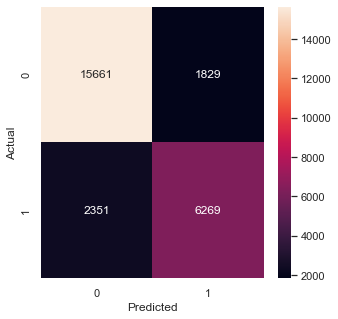

Classification report:
              precision    recall  f1-score   support

           0       0.87      0.90      0.88     17490
           1       0.77      0.73      0.75      8620

    accuracy                           0.84     26110
   macro avg       0.82      0.81      0.82     26110
weighted avg       0.84      0.84      0.84     26110



In [32]:
random.seed(711)
df.fillna(value=0, inplace=True)
df.replace([np.inf, -np.inf], 0, inplace=True)

X = df.values[:,:-1]
y = df.values[:,-1]
y = y.astype('int')

# scale the data - to a range -1, 1 
min_max_scaler = MinMaxScaler(feature_range = (-1,1))
X = min_max_scaler.fit_transform(X)

# Apply SMOTE oversampling to balance the classes
oversample = SVMSMOTE()
X, y = oversample.fit_resample(X, y)
    

model = AdaBoostClassifier(
    base_estimator=DecisionTreeClassifier(max_depth=1),
    n_estimators=100)
# Train the classifier on the training data
model.fit(X,y)

y_pred = cross_val_predict(model, X, y, cv=10)
conf_mat = confusion_matrix(y, y_pred)
fig, ax = plt.subplots(figsize=(5,5))
sns.heatmap(conf_mat, annot=True, fmt='d')

plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()
accuracy = accuracy_score(y, y_pred)

report = classification_report(y, y_pred)

print(f"Classification report:\n{report}")


## MPLC

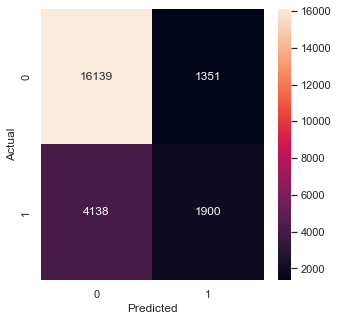

Classification report:
              precision    recall  f1-score   support

           0       0.80      0.92      0.85     17490
           1       0.58      0.31      0.41      6038

    accuracy                           0.77     23528
   macro avg       0.69      0.62      0.63     23528
weighted avg       0.74      0.77      0.74     23528



In [28]:
random.seed(711)
df.fillna(value=0, inplace=True)
df.replace([np.inf, -np.inf], 0, inplace=True)

X = df.values[:,:-1]
y = df.values[:,-1]
y = y.astype('int')

# scale the data - to a range -1, 1 
min_max_scaler = MinMaxScaler(feature_range = (-1,1))
X = min_max_scaler.fit_transform(X)

# Apply SMOTE oversampling to balance the classes
oversample = SVMSMOTE()
X, y = oversample.fit_resample(X, y)
    

model = MLPClassifier(activation = 'tanh', alpha = 0.0001, hidden_layer_sizes = (10,30,10), solver = 'sgd', max_iter=100)

# Train the classifier on the training data
model.fit(X,y)

y_pred = cross_val_predict(model, X, y, cv=10)
conf_mat = confusion_matrix(y, y_pred)
fig, ax = plt.subplots(figsize=(5,5))
sns.heatmap(conf_mat, annot=True, fmt='d')

plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()
accuracy = accuracy_score(y, y_pred)

report = classification_report(y, y_pred)

print(f"Classification report:\n{report}")

## Feature Engineering 

In [29]:
# drop columns  
df = data.drop(['Unnamed: 0', 'symbol', 'ID', "IsSingleNode",
                'PartnerOfMultiEdgedNodePairs', 
                'SelfLoops', 'NumberOfDirectedEdges', 
               'chr_start_pos', 'chr_end_pos'],axis = 1)

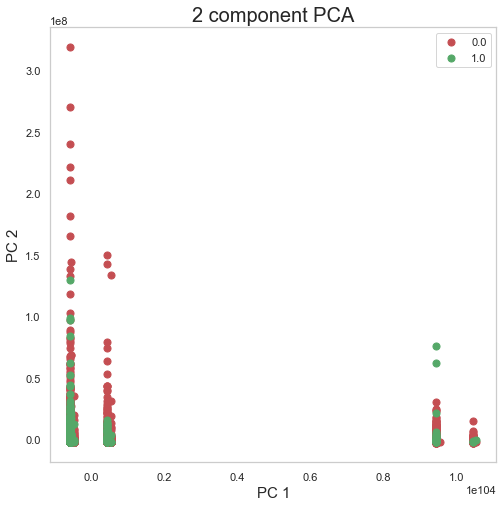

In [30]:
# cluster visualization using PCA
from sklearn.decomposition import PCA
random.seed(711)
pca = PCA(n_components=2)
x = df.values[:,:-1]
y = df.values[:,-1]
y = y.astype('int')
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents, columns = ['PC1', 'PC2'])
finalDf = pd.concat([principalDf, df['label']], axis = 1)
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('PC 1', fontsize = 15)
ax.set_ylabel('PC 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = [0.0,1.0]
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['label'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'PC1'], finalDf.loc[indicesToKeep, 'PC2'], c = color, s = 50)
ax.legend(targets)
ax.grid()

In [31]:
display(principalDf)

,PC1,PC2
0,-5.595334e+102,-8.658318e+05
1,-5.595334e+102,1.230680e+06
2,-5.585323e+102,-1.578422e+06
3,-5.595334e+102,-1.859430e+06
4,-5.595334e+102,-9.543998e+05
...,...,...
18179,-5.595334e+102,-1.873024e+06
18180,-5.595334e+102,-1.105684e+06
18181,-5.595334e+102,4.011062e+05
18182,-5.595334e+102,-7.350538e+05


## Recursive Feature Selection using SVC

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.svm import SVC

# Create an instance of the SVM classifier
svc = SVC(kernel="linear", C=1)

# Create a recursive feature eliminator with cross-validation
rfe = RFE(estimator=svc, n_features_to_select=10, step=1)

# Fit the feature eliminator to the data
rfe.fit(x, y)

# Print the indices of the selected features
print(rfe.support_)

# Print the rank of each feature
print(rfe.ranking_)

### Filtered data

In [ ]:
# selected 10 features 
included = []
for i in range(len(df.columns)-1):
    if rfe.support_[i] == True:
        included.append(df.columns[i])
print(included)

included.append('label')

new_df = df[included]

In [ ]:
# add pcas
new_df['PC1'] = principalDf['PC1']
new_df['PC2'] = principalDf['PC2']

In [ ]:
display(new_df)

## Random Forest Using New Df

In [ ]:
import random
from sklearn.preprocessing import MinMaxScaler
from imblearn import under_sampling, over_sampling
from imblearn.over_sampling import SVMSMOTE

random.seed(711)
new_df.fillna(value=0, inplace=True)
new_df.replace([np.inf, -np.inf], 0, inplace=True)

X = new_df.values[:,:-1]
y = new_df.values[:,-1]
y = y.astype('int')

# scale the data - to a range -1, 1 
min_max_scaler = MinMaxScaler(feature_range = (-1,1))
X = min_max_scaler.fit_transform(X)

# Apply SMOTE oversampling to balance the classes
oversample = SVMSMOTE()
X, y = oversample.fit_resample(X, y)

model = RandomForestClassifier(n_estimators=200, random_state=42)

# Train the classifier on the training data
model.fit(X,y)

y_pred = cross_val_predict(model, X, y, cv=10)
conf_mat = confusion_matrix(y, y_pred)
fig, ax = plt.subplots(figsize=(5,5))
sns.heatmap(conf_mat, annot=True, fmt='d')

plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()
accuracy = accuracy_score(y, y_pred)

report = classification_report(y, y_pred)

print(f"Classification report:\n{report}")

## Training Models using original data

Mean Accuracy: 0.666
Confusion matrix:
[[17490     0]
 [ 8752     0]]
Classification report:
              precision    recall  f1-score   support

           0       0.67      1.00      0.80     17490
           1       0.00      0.00      0.00      8752

    accuracy                           0.67     26242
   macro avg       0.33      0.50      0.40     26242
weighted avg       0.44      0.67      0.53     26242

Mean Accuracy: 0.608
Confusion matrix:
[[7830 9660]
 [ 623 8129]]
Classification report:
              precision    recall  f1-score   support

           0       0.93      0.45      0.60     17490
           1       0.46      0.93      0.61      8752

    accuracy                           0.61     26242
   macro avg       0.69      0.69      0.61     26242
weighted avg       0.77      0.61      0.61     26242

Mean Accuracy: 0.966
Confusion matrix:
[[17213   277]
 [  614  8138]]
Classification report:
              precision    recall  f1-score   support

           0    

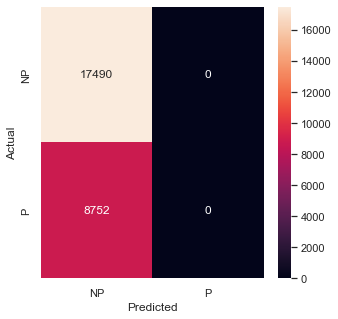

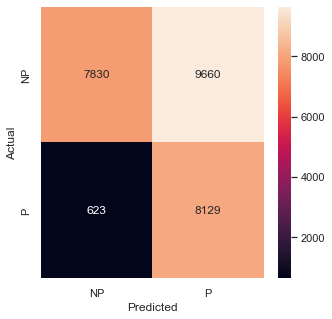

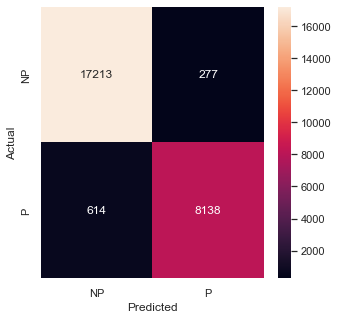

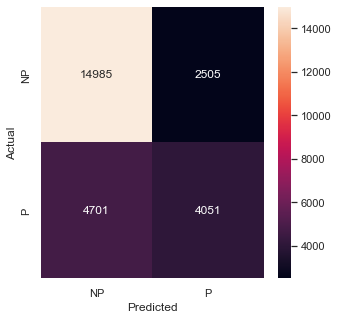

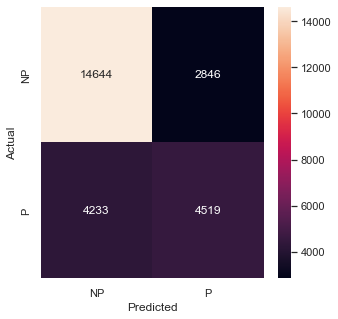

In [202]:
# this function receives a dataframe and compute the accuracy score, confusion matrix and classification report of different models  
def train_model(df):
    df.fillna(value=0, inplace=True)
    df.replace([np.inf, -np.inf], 0, inplace=True)

    X = df.values[:,:-1]
    y = df.values[:,-1]
    y = y.astype('int')
    
    # scale the data - to a range -1, 1 
    min_max_scaler = MinMaxScaler(feature_range = (-1,1))
    X = min_max_scaler.fit_transform(X)
    
    # Apply SMOTE oversampling to balance the classes
    oversample = SVMSMOTE()
    X, y = oversample.fit_resample(X, y)

    model_names = ["Baseline", "Naive Bayes", "Random Forest", "Logistic Regression", 
                  "MLPClassifier"]
    # models 
    ms = [
    DummyClassifier(strategy='uniform'),
        GaussianNB(),
        RandomForestClassifier(n_estimators=200, random_state=42),
    LogisticRegression(solver='lbfgs'),
    MLPClassifier(activation = 'tanh', alpha = 0.0001, hidden_layer_sizes = (10,30,10), solver = 'sgd', max_iter=100)
    ]

    scores = []
    labels = ['NP', 'P']
    i = 0
    for m in ms:
        model = m.fit(X,y)
        y_pred = cross_val_predict(model, X, y, cv=10)
        conf_mat = confusion_matrix(y, y_pred)
        fig, ax = plt.subplots(figsize=(5,5))
        sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=labels, yticklabels=labels)

        plt.ylabel('Actual')
        plt.xlabel('Predicted')
        # plt.show()
        accuracy = accuracy_score(y, y_pred)
        scores.append(accuracy)
        # print(r2_score(y_test,y_pred))
        
        print("Classifier:", model_names[i])
        i = i + 1
        print('Mean Accuracy: %.3f' % (accuracy))
        print(f"Confusion matrix:\n{conf_mat}")
        print(f"Classification report:\n{classification_report(y, y_pred)}")
    

# call the function 
train_model(df)

## Training Models using Filtered data

In [ ]:
# call the function 
train_model(new_df)

## Train a random forest classifier

In [199]:
# oversampling 
from imblearn.over_sampling import RandomOverSampler

oversample = SVMSMOTE()
X = df.values[:,:-1]
y = df.values[:,-1]
y = y.astype('int')


# scale the data - to a range -1, 1 
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler(feature_range = (-1,1))
X = min_max_scaler.fit_transform(X)

# Resample data using oversampler
X_resampled, y_resampled = oversample.fit_resample(X, y)

# split the data
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, stratify=y_resampled)

# Train a random forest classifier
rfc = RandomForestClassifier(n_estimators=200, random_state=42)
rfc.fit(X_train, y_train)

# Test the model on the testing set
y_pred = rfc.predict(X_test)

# Print the classification report
confusion_mat = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Confusion matrix:\n{confusion_mat}")
print(f"Classification report:\n{report}")

Confusion matrix:
[[5186   61]
 [ 275 1445]]
Classification report:
              precision    recall  f1-score   support

           0       0.95      0.99      0.97      5247
           1       0.96      0.84      0.90      1720

    accuracy                           0.95      6967
   macro avg       0.95      0.91      0.93      6967
weighted avg       0.95      0.95      0.95      6967



In [201]:
# Print feature importances
importances = rfc.feature_importances_
for feature, importance in zip(df.columns[:-1], importances):
    print('{}: {}'.format(feature, importance))

AverageShortestPathLength: 0.05111994559694623
ClusteringCoefficient: 0.07324680173282502
ClosenessCentrality: 0.058631862864576716
Eccentricity: 0.013333252674586593
Stress: 0.07616672432598855
Degree: 0.07140645248286046
BetweennessCentrality: 0.05101566396399123
NeighborhoodConnectivity: 0.06380556284009306
NumberOfUndirectedEdges: 0.06518532650331534
Radiality: 0.05462460506214979
TopologicalCoefficient: 0.050763948669296
cellular_comp: 0.03885089074076807
GC_content: 0.06105241020879174
chromosome_name: 0.061605755102292
PLFC_SC: 0.0009969822152565892
PLFC_DRG: 0.007214462006182069
PLFC_SN: 0.008692435304611583
GO_vector: 0.03565593536339831
LFC_drg: 0.07677226867665854
LFC_skin: 0.0005279995663677662
LFC_ipsc: 0.027644026262850823
Conservation_score: 0.051686687836193616


## Logistic Regression

In [116]:
# convert the prob scores to a ranking? 
probs = pd.DataFrame(proba_scores)

## Neural Network Hyperparameter Tuning

In [90]:
import warnings
warnings.filterwarnings('ignore')

# tune parameters for mlpc using gridsearch  
mlp_gs = MLPClassifier(max_iter=100)
parameter_space = {
    'hidden_layer_sizes': [(10,30,10),(20,)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
}

X = X_train
y = y_train
y = y.astype('int')

from sklearn.model_selection import GridSearchCV
clf = GridSearchCV(mlp_gs, parameter_space, n_jobs=-1, cv=5)
clf.fit(X, y) # X is train samples and y is the corresponding labels

print('Best parameters found:\n', clf.best_params_)

/Users/lynnezhao/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/lynnezhao/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/lynnezhao/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/lynnezhao/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/l

/Users/lynnezhao/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/lynnezhao/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/lynnezhao/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/lynnezhao/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/l

Best parameters found:
 {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (10, 30, 10), 'learning_rate': 'constant', 'solver': 'sgd'}
